<a href="https://colab.research.google.com/github/tennille-bernard/Kal-Academy-Assignments/blob/main/Assignment_2_1_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important Note:** The grade required to pass was not defined in the problem nor in the dataset. We will set an arbitrary grade of 80% or any score where G3 >= 16.

**Initialization**  
Import packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Loading and understanding the data** aka what am I looking at.

In [ ]:
dataset_mat = pd.read_csv('student-mat.csv', sep =';')
dataset_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
dataset_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
dataset_por = pd.read_csv('student-por.csv', sep =';')
dataset_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
dataset_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Column definitions can be found here under 'Variables Table': https://archive.ics.uci.edu/dataset/320/student+performance

**Defining features and label for dataset_mat**  


In [ ]:
features_mat = ['school', 'address', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
label_mat = ['G3']

'''features_mat = ['G1', 'G2']
label_mat = ['G3']'''

X_mat = dataset_mat[features_mat].values
y_mat = dataset_mat[label_mat].values

**Using p-value to determine if a feature is valuable**
p-value < 0.05 → The feature is statistically significant.
p-value > 0.05 → The feature is not significant.

In [ ]:
import statsmodels.api as sm

# Define independent variables (features)
features_mat_sm = dataset_mat[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']]
features_mat_sm = sm.add_constant(features_mat_sm)  # Add constant term for intercept

# Define dependent variable (target)
label_mat_sm = dataset_mat['G3']

# Fit OLS Regression Model
model = sm.OLS(label_mat_sm, features_mat_sm).fit()

# Display summary of regression results, including p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          1.78e-138
Time:                        09:00:27   Log-Likelihood:                -809.23
No. Observations:                 395   AIC:                             1646.
Df Residuals:                     381   BIC:                             1702.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4837      0.746     -3.331      0.0

From this, we see that in terms of numerical type columns, only failures, absences, G1 and G2 are statistically significant for Math  
We'll build our model around these.

In [ ]:
import statsmodels.api as sm

# Define independent variables (features)
features_por_sm = dataset_por[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']]
features_por_sm = sm.add_constant(features_por_sm)  # Add constant term for intercept

# Define dependent variable (target)
label_por_sm = dataset_por['G3']

# Fit OLS Regression Model
model = sm.OLS(label_por_sm, features_por_sm).fit()

# Display summary of regression results, including p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     282.8
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          6.85e-254
Time:                        09:00:27   Log-Likelihood:                -1059.9
No. Observations:                 649   AIC:                             2148.
Df Residuals:                     635   BIC:                             2210.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2678      0.395      0.679      0.4

For Portuguese, we see the same features have statistical significance.  In this case, we can use the same model for math and Portuguese.

In [ ]:
features = ['failures', 'absences', 'G1', 'G2']
label = ['G3']

X_mat = dataset_mat[features].values
y_mat= dataset_mat[label].values

X_por = dataset_por[features].values
y_por= dataset_por[label].values

**Data Preprocessing**  
Scaling and column transforming - to be revised considering our model has all numerical data types

In [ ]:
'''from sklearn.compose import ColumnTransformer     #Use ColumnTransformer to transform one of the columns from .compose
from sklearn.preprocessing import OneHotEncoder     #.preprocessing to grab OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,5,6,7])], remainder='passthrough')     # Transforming columns by index, passing through remainder of the data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,5,6,7])], remainder='passthrough')     # Transforming columns by index, passing through remainder of the data
X_mat = np.array(ct.fit_transform(X_mat))
print(len(X_mat[0]))'''

"from sklearn.compose import ColumnTransformer     #Use ColumnTransformer to transform one of the columns from .compose\nfrom sklearn.preprocessing import OneHotEncoder     #.preprocessing to grab OneHotEncoder\n#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,5,6,7])], remainder='passthrough')     # Transforming columns by index, passing through remainder of the data\nct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,5,6,7])], remainder='passthrough')     # Transforming columns by index, passing through remainder of the data\nX_mat = np.array(ct.fit_transform(X_mat))\nprint(len(X_mat[0]))"

**Let's look at Math first**

**Set training and test data split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X_mat, y_mat, test_size = .2, random_state = 0)

In [ ]:
print(X_train_mat)
print(X_test_mat)
print(y_train_mat)
print(y_test_mat)

[[ 0  0 10 10]
 [ 0  8  8  9]
 [ 1  0  9  8]
 ...
 [ 0  0 13 14]
 [ 0  4 19 19]
 [ 0  0 13 11]]
[[ 0  4 14 14]
 [ 0  0 11 11]
 [ 0  9  9 10]
 [ 0  2 16 15]
 [ 0  2 15 16]
 [ 0  6 13 12]
 [ 0  0 12 13]
 [ 0  6 10 11]
 [ 0  5  8  9]
 [ 0  0 16 15]
 [ 0  2  8  8]
 [ 0 54 11 12]
 [ 0  8 11 11]
 [ 0  8  7  8]
 [ 0  2 14 15]
 [ 0  2 14 14]
 [ 0 12 10 13]
 [ 0  0  9 10]
 [ 0 10 10  9]
 [ 0  0 14 15]
 [ 0  0  6  7]
 [ 3  0  6  5]
 [ 0  0  7  7]
 [ 0  2 13 15]
 [ 0  1 12 12]
 [ 0  7 15 16]
 [ 0  4  9 10]
 [ 0 10 18 19]
 [ 0  0 11  0]
 [ 0  4 10 13]
 [ 3  0  5  0]
 [ 3  2  8  8]
 [ 0  2  9  8]
 [ 2 22  6  6]
 [ 0  2 14 13]
 [ 1 18 12 10]
 [ 0  6 10 13]
 [ 0 21 17 18]
 [ 0  0  8  9]
 [ 0  0 12 12]
 [ 0  4  5  5]
 [ 0  6 18 18]
 [ 1 15  9  8]
 [ 1  2  7  9]
 [ 0  6 10 10]
 [ 3  0  5  0]
 [ 0 10 11 12]
 [ 1  0  6  5]
 [ 0  4 12 12]
 [ 3  0  5  8]
 [ 0 10 11  9]
 [ 0  2 16 18]
 [ 1  6 11 11]
 [ 0  0 10  8]
 [ 0  2 12 12]
 [ 0  8  8  8]
 [ 0 14 11  9]
 [ 0  0 12 13]
 [ 0  0 13 15]
 [ 0  0 13 14]
 [ 0

**Trying models to see which works best**  
SLR, MLR, Polynomial, Decision Tree, SVR, Random Forest

**1. Simple Linear Regression then Multiple Linear Regression**

1.a Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_mat, y_train_mat)     #Supervised training model - telling regressor to train on this data

LinearRegression()

In [ ]:
y_mat_pred_simple = regressor.predict(X_test_mat)

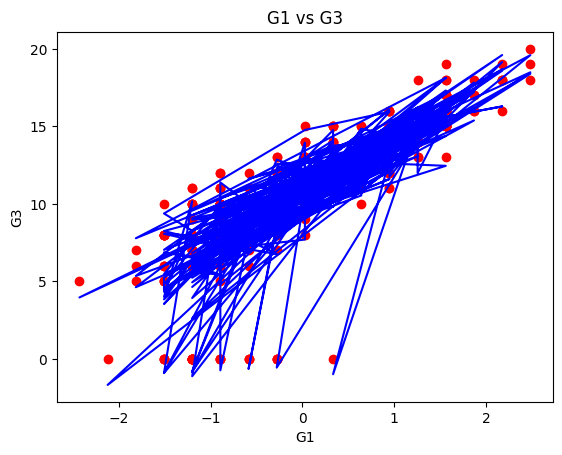

In [ ]:
plt.scatter(X_train_mat[:,2], y_train_mat, color = 'red')
plt.plot(X_train_mat[:, 2], regressor.predict(X_train_mat), color = 'blue')
plt.title('G1 vs G3')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

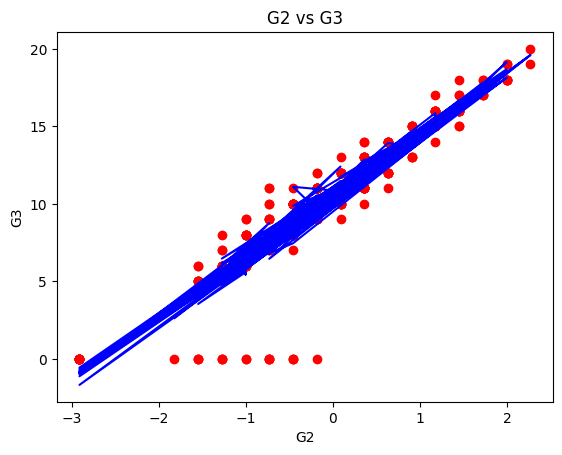

In [ ]:
plt.scatter(X_train_mat[:,3], y_train_mat, color = 'red')
plt.plot(X_train_mat[:, 3], regressor.predict(X_train_mat), color = 'blue')
plt.title('G2 vs G3')
plt.xlabel('G2')
plt.ylabel('G3')
plt.show()

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test_mat.reshape(len(y_test_mat),1), y_mat_pred_simple.reshape(len(y_mat_pred_simple),1) ),1))

[[14.   14.12]
 [10.   10.64]
 [ 9.    9.88]
 [15.   15.2 ]
 [16.   16.13]
 [12.   12.11]
 [14.   12.74]
 [11.   10.84]
 [ 9.    8.6 ]
 [15.   15.11]
 [10.    7.44]
 [11.   14.21]
 [10.   11.02]
 [ 8.    7.64]
 [15.   15.03]
 [14.   14.02]
 [12.   13.14]
 [ 0.    9.46]
 [10.    9.01]
 [16.   14.94]
 [ 0.    6.17]
 [ 0.    3.25]
 [ 8.    6.25]
 [16.   14.95]
 [12.   11.78]
 [15.   16.37]
 [10.    9.65]
 [19.   19.8 ]
 [ 0.   -0.47]
 [14.   12.76]
 [ 0.   -1.88]
 [10.    6.55]
 [ 8.    7.53]
 [ 4.    5.61]
 [13.   13.01]
 [10.   10.27]
 [13.   12.86]
 [18.   19.22]
 [ 8.    8.36]
 [11.   11.73]
 [ 6.    4.25]
 [18.   18.6 ]
 [ 8.    7.85]
 [ 8.    8.07]
 [11.    9.83]
 [ 0.   -1.88]
 [13.   12.12]
 [ 0.    3.85]
 [13.   11.92]
 [ 7.    6.2 ]
 [10.    9.09]
 [18.   18.23]
 [10.   10.63]
 [ 9.    7.52]
 [11.   11.83]
 [ 6.    7.73]
 [ 9.    9.28]
 [13.   12.74]
 [15.   14.85]
 [14.   13.84]
 [14.   13.16]
 [15.   13.43]
 [14.   14.12]
 [15.   15.29]
 [ 0.    8.53]
 [15.   15.5 ]
 [19.   18

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_mat, y_mat_pred_simple)
print("R2: ", r2 )

R2:  0.8027672911219506


Grade of a student with 2 failures, 0 abscences, G1 = 17, G2 = 18

In [ ]:
#r2_y_mat = regressor.predict([[2,0,17,18]])
#print(r2_y_mat)

print(regressor.predict([[2,0,17,18]]))

[[17.63]]


R2 value is Ok, with a G3 grade of 17.63 (Pass)

1.b. Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train_mat, y_train_mat)

LinearRegression()

In [ ]:
y_mat_pred_mlr = regressor.predict(X_test_mat)
np.set_printoptions(precision=2)
#print(np.concatenate((y_mat_pred.reshape(len(y_mat_pred),1), y_mat_test.values.reshape(len(y_mat_test),1)),1))
print(np.concatenate((y_mat_pred_mlr.reshape(len(y_mat_pred_mlr),1), y_test_mat.reshape(len(y_test_mat),1)),1))

[[14.12 14.  ]
 [10.64 10.  ]
 [ 9.88  9.  ]
 [15.2  15.  ]
 [16.13 16.  ]
 [12.11 12.  ]
 [12.74 14.  ]
 [10.84 11.  ]
 [ 8.6   9.  ]
 [15.11 15.  ]
 [ 7.44 10.  ]
 [14.21 11.  ]
 [11.02 10.  ]
 [ 7.64  8.  ]
 [15.03 15.  ]
 [14.02 14.  ]
 [13.14 12.  ]
 [ 9.46  0.  ]
 [ 9.01 10.  ]
 [14.94 16.  ]
 [ 6.17  0.  ]
 [ 3.25  0.  ]
 [ 6.25  8.  ]
 [14.95 16.  ]
 [11.78 12.  ]
 [16.37 15.  ]
 [ 9.65 10.  ]
 [19.8  19.  ]
 [-0.47  0.  ]
 [12.76 14.  ]
 [-1.88  0.  ]
 [ 6.55 10.  ]
 [ 7.53  8.  ]
 [ 5.61  4.  ]
 [13.01 13.  ]
 [10.27 10.  ]
 [12.86 13.  ]
 [19.22 18.  ]
 [ 8.36  8.  ]
 [11.73 11.  ]
 [ 4.25  6.  ]
 [18.6  18.  ]
 [ 7.85  8.  ]
 [ 8.07  8.  ]
 [ 9.83 11.  ]
 [-1.88  0.  ]
 [12.12 13.  ]
 [ 3.85  0.  ]
 [11.92 13.  ]
 [ 6.2   7.  ]
 [ 9.09 10.  ]
 [18.23 18.  ]
 [10.63 10.  ]
 [ 7.52  9.  ]
 [11.83 11.  ]
 [ 7.73  6.  ]
 [ 9.28  9.  ]
 [12.74 13.  ]
 [14.85 15.  ]
 [13.84 14.  ]
 [13.16 14.  ]
 [13.43 15.  ]
 [14.12 14.  ]
 [15.29 15.  ]
 [ 8.53  0.  ]
 [15.5  15.  ]
 [18.55 19

In [ ]:
from sklearn.metrics import r2_score
r2_mlr = r2_score(y_test_mat, y_mat_pred_mlr)
print("R2: ", r2 )

R2:  0.8027672911219506


In [ ]:
print(regressor.predict([[2,0,17,18]]))

[[17.63]]


No real difference between simple and multiple linear regression values.

**3. Polynomial Linear Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_mat = PolynomialFeatures(degree = 4)
X_poly_mat = poly_reg_mat.fit_transform(X_train_mat)
lin_reg_2_mat = LinearRegression()
lin_reg_2_mat.fit(X_poly_mat, y_train_mat)

LinearRegression()

In [ ]:
print(lin_reg_2_mat.predict(poly_reg_mat.fit_transform([[2,0,17,18]])))

[[30.15]]


In [ ]:
from sklearn.metrics import r2_score
r2_plr_mat = r2_score(y_train_mat, lin_reg_2_mat.predict(X_poly_mat))
print("R2: ", r2_plr_mat )

R2:  0.9162387945088573


In [ ]:
#adjusted R2
adjusted_r2_plr_mat = 1 - (1-r2_plr_mat)*(len(y_train_mat)-1)/(len(y_train_mat)-X_mat.shape[1]-1)
print("Adjusted R2: ", adjusted_r2_plr_mat)

Adjusted R2:  0.9151614799687783


Grade is suspect, since 0=<G3=<20.

**3. Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt_mat = DecisionTreeRegressor(random_state = 0)
regressor_dt_mat.fit(X_mat, y_mat)

DecisionTreeRegressor(random_state=0)

In [ ]:
print(regressor_dt_mat.predict([[2,0,17,18]]))

[18.]


This value is in range. Let's check the accuracy.

In [ ]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
y_pred_dt_mat = regressor_dt_mat.predict(X_mat)
mse = mean_squared_error(y_mat, y_pred_dt_mat)
print("MSE: ", mse)

MSE:  0.6337552742616033


In [ ]:
from sklearn.metrics import r2_score
r2_dt_mat = r2_score(y_mat, regressor_dt_mat.predict(X_mat))
print("R2: ", r2_dt_mat )

R2:  0.9697296140080626


As MSE is small (0.63) and the value is in range, this may be a good model.

**4. Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf_mat = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rf_mat.fit(X_mat, y_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
print(regressor_rf_mat.predict([[2,0,17,18]]))

[18.32]


In [ ]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
y_pred_rf_mat = regressor_rf_mat.predict(X_mat)
mse = mean_squared_error(y_mat, y_pred_rf_mat)
print("MSE: ", mse)

MSE:  0.9502370221471148


In [ ]:
from sklearn.metrics import r2_score
r2_rf_mat = r2_score(y_mat, regressor_rf_mat.predict(X_mat))
print("R2: ", r2_rf_mat )

R2:  0.9546133300780246


**5. SVM Regression**

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X_mat = StandardScaler()
sc_y_mat = StandardScaler()
X_svm_mat = sc_X_mat.fit_transform(X_mat)
y_svm_mat = sc_y_mat.fit_transform(y_mat)

In [ ]:
from sklearn.svm import SVR
regressor_svm_mat = SVR(kernel = 'rbf')
regressor_svm_mat.fit(X_svm_mat, y_svm_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(sc_y_mat.inverse_transform(regressor_svm_mat.predict(sc_X_mat.transform([[2,0,17,18]])).reshape(-1,1)))

[[13.52]]


In [ ]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
y_pred_svm_mat = regressor_svm_mat.predict(X_mat)
mse = mean_squared_error(y_mat, y_pred_svm_mat)
print("MSE: ", mse)

MSE:  137.11246288638543


In [ ]:
from sklearn.metrics import r2_score
r2_svm_mat = r2_score(y_mat, regressor_svm_mat.predict(X_mat))
print("R2: ", r2_svm_mat )

R2:  -5.548974571788491


With the high MSE and bad R2 value, I do not trust this model.

**Preferred models for Mat:** Random Forest, Decision Tree.

**Now doing the same for Portuguese**

In [ ]:
X_por = dataset_por[features].values
y_por= dataset_por[label].values

**Set training and test data split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por, y_por, test_size = .2, random_state = 0)

**Trying models to see which works best**
SLR, MLR, Polynomial, Decision Tree, SVR, Random Forest

**1. Simple and Multiple Linear Regression**

1.a Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_slr_por = LinearRegression()
regressor_slr_por.fit(X_train_por, y_train_por)

LinearRegression()

In [ ]:
y_por_pred_simple = regressor.predict(X_test_por)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test_por.reshape(len(y_test_por),1), y_por_pred_simple.reshape(len(y_por_pred_simple),1) ),1))

[[ 8.    8.  ]
 [15.   14.  ]
 [16.   15.  ]
 [10.    9.67]
 [10.    0.  ]
 [12.   11.  ]
 [13.   14.  ]
 [17.   18.  ]
 [12.   10.  ]
 [12.   12.  ]
 [11.   12.  ]
 [10.   10.  ]
 [13.   12.33]
 [ 8.    8.  ]
 [18.   18.  ]
 [12.   11.  ]
 [13.   12.  ]
 [13.   11.  ]
 [10.   10.  ]
 [10.    9.67]
 [12.   12.  ]
 [10.   10.  ]
 [17.   17.  ]
 [15.   13.5 ]
 [14.   11.  ]
 [ 0.    0.  ]
 [12.   11.  ]
 [14.   13.5 ]
 [12.   10.67]
 [ 9.   11.  ]
 [13.   14.  ]
 [16.   16.5 ]
 [13.   13.5 ]
 [16.   16.  ]
 [12.   11.  ]
 [10.   10.  ]
 [10.    9.  ]
 [11.   10.6 ]
 [13.   12.  ]
 [10.    9.  ]
 [15.   15.  ]
 [18.   17.  ]
 [11.   10.6 ]
 [13.   13.5 ]
 [13.   10.  ]
 [10.    9.  ]
 [14.   12.  ]
 [ 9.    9.  ]
 [11.   10.67]
 [10.    8.  ]
 [ 8.    5.  ]
 [17.   14.  ]
 [ 9.    9.67]
 [13.   11.  ]
 [ 8.    9.  ]
 [11.   11.  ]
 [12.   12.  ]
 [12.   11.  ]
 [15.   14.  ]
 [15.   14.  ]
 [13.   14.  ]
 [ 7.   10.  ]
 [12.   10.  ]
 [10.   10.  ]
 [12.   12.5 ]
 [12.   12.  ]
 [11.   12

In [ ]:
from sklearn.metrics import r2_score
r2_por = r2_score(y_test_por, y_por_pred_simple)
print("R2: ", r2 )

R2:  0.20600643310899358


Grade of a student with 0 failures, 3 abscences, G1 = 19, G2 = 20

In [ ]:
print(regressor.predict([[0,3,19,20]]))

[20.]


Bad model.

1.b Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_mlr_por = LinearRegression()
regressor_mlr_por.fit(X_train_por, y_train_por)

LinearRegression()

In [ ]:
y_por_pred_mlr = regressor.predict(X_test_por)
np.set_printoptions(precision=2)
#print(np.concatenate((y_mat_pred.reshape(len(y_mat_pred),1), y_mat_test.values.reshape(len(y_mat_test),1)),1))
print(np.concatenate((y_por_pred_mlr.reshape(len(y_por_pred_mlr),1), y_test_por.reshape(len(y_test_por),1)),1))

[[ 8.    8.  ]
 [14.   15.  ]
 [15.   16.  ]
 [ 9.67 10.  ]
 [ 0.   10.  ]
 [11.   12.  ]
 [14.   13.  ]
 [18.   17.  ]
 [10.   12.  ]
 [12.   12.  ]
 [12.   11.  ]
 [10.   10.  ]
 [12.33 13.  ]
 [ 8.    8.  ]
 [18.   18.  ]
 [11.   12.  ]
 [12.   13.  ]
 [11.   13.  ]
 [10.   10.  ]
 [ 9.67 10.  ]
 [12.   12.  ]
 [10.   10.  ]
 [17.   17.  ]
 [13.5  15.  ]
 [11.   14.  ]
 [ 0.    0.  ]
 [11.   12.  ]
 [13.5  14.  ]
 [10.67 12.  ]
 [11.    9.  ]
 [14.   13.  ]
 [16.5  16.  ]
 [13.5  13.  ]
 [16.   16.  ]
 [11.   12.  ]
 [10.   10.  ]
 [ 9.   10.  ]
 [10.6  11.  ]
 [12.   13.  ]
 [ 9.   10.  ]
 [15.   15.  ]
 [17.   18.  ]
 [10.6  11.  ]
 [13.5  13.  ]
 [10.   13.  ]
 [ 9.   10.  ]
 [12.   14.  ]
 [ 9.    9.  ]
 [10.67 11.  ]
 [ 8.   10.  ]
 [ 5.    8.  ]
 [14.   17.  ]
 [ 9.67  9.  ]
 [11.   13.  ]
 [ 9.    8.  ]
 [11.   11.  ]
 [12.   12.  ]
 [11.   12.  ]
 [14.   15.  ]
 [14.   15.  ]
 [14.   13.  ]
 [10.    7.  ]
 [10.   12.  ]
 [10.   10.  ]
 [12.5  12.  ]
 [12.   12.  ]
 [12.   11

In [ ]:
from sklearn.metrics import r2_score
r2_mlr_por = r2_score(y_test_por, y_por_pred_mlr)
print("R2: ", r2 )

R2:  0.20600643310899358


In [ ]:
print(regressor.predict([[0,3,19,20]]))

[20.]


Bad model.

**2. Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_por = PolynomialFeatures(degree = 4)
X_poly_por = poly_reg_por.fit_transform(X_train_por)
lin_reg_2_por = LinearRegression()
lin_reg_2_por.fit(X_poly_por, y_train_por)

LinearRegression()

In [ ]:
print(lin_reg_2_por.predict(poly_reg_por.fit_transform([[0,3,19,20]])))

[[20.83]]


In [ ]:
from sklearn.metrics import r2_score
r2_plr_por = r2_score(y_train_por, lin_reg_2_por.predict(X_poly_por))
print("R2: ", r2_plr_por)

R2:  0.8931186699517178


In [ ]:
#adjusted R2
adjusted_r2_plr_por = 1 - (1-r2_plr_por)*(len(y_train_por)-1)/(len(y_train_por)-X_por.shape[1]-1)
print("Adjusted R2: ", adjusted_r2_plr_por)

Adjusted R2:  0.8922869086283849


G3 is outside the range [0,20]. Sus.

**3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt_por = DecisionTreeRegressor(random_state = 0)
regressor_dt_por.fit(X_por, y_por)

DecisionTreeRegressor(random_state=0)

In [ ]:
print(regressor_dt_por.predict([[0,3,19,20]]))

[19.]


In [ ]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
y_pred_dt_por = regressor_dt_por.predict(X_por)
mse_dt_por = mean_squared_error(y_por, y_pred_dt_por)
print("MSE: ", mse_dt_por)

MSE:  0.48113394053301606


In [ ]:
from sklearn.metrics import r2_score
r2_dt_por = r2_score(y_por, regressor_dt_por.predict(X_por))
print("R2: ", r2_dt_por)

R2:  0.953830604715392


Good model. R2 close to, but not equal to 1. MSE is small. predicted G3 is in range.

**4. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf_por = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rf_por.fit(X_por, y_por)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
print(regressor_rf_por.predict([[0,3,19,20]]))

[18.89]


In [ ]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
y_pred_rf_por = regressor_rf_por.predict(X_por)
mse_rf_por = mean_squared_error(y_por, y_pred_rf_por)
print("MSE: ", mse_rf_por)

MSE:  0.6409727346229448


In [ ]:
from sklearn.metrics import r2_score
r2_rf_por = r2_score(y_por, regressor_rf_por.predict(X_por))
print("R2: ", r2_rf_por)

R2:  0.9384925463402594


Good model. R2 close to, but not equal to 1. MSE is small. predicted G3 is in range.

**5. SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X_por = StandardScaler()
sc_y_por = StandardScaler()
X_svm_por = sc_X_por.fit_transform(X_por)
y_svm_por = sc_y_por.fit_transform(y_por)

In [ ]:
from sklearn.svm import SVR
regressor_svm_por = SVR(kernel = 'rbf')
regressor_svm_por.fit(X_svm_por, y_svm_por)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(sc_y_por.inverse_transform(regressor_svm_por.predict(sc_X_por.transform([[0,3,19,20]])).reshape(-1,1)))

[[17.3]]


In [ ]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
y_pred_svm_por = regressor_svm_por.predict(X_por)
mse_svm_por = mean_squared_error(y_por, y_pred_svm_por)
print("MSE: ", mse_svm_por)

MSE:  162.6959979878711


In [ ]:
from sklearn.metrics import r2_score
r2_svm_por = r2_score(y_por, regressor_svm_por.predict(X_por))
print("R2: ", r2_svm_por)

R2:  -14.612234368675455


With the high MSE and bad R2 value, I do not trust this model.

**Prefered Models for Por:** Decision Tree, Random Forest